In [1]:
from utils.dataloader import Dataloader

dataloader = Dataloader(data_dir="data/")

data = dataloader.load_all()
comprehensive_data = data["comprehensive_data"]
covid19_testing_record = data["covid19_testing_record"]
covid19_variants_found = data["covid19_variants_found"]
vaccinations_by_country = data["vaccinations_by_country"]
vaccination_by_manufacturer = data["vaccination_by_manufacturer"]

Looking at the spread of each variant in each country in the Western Europe

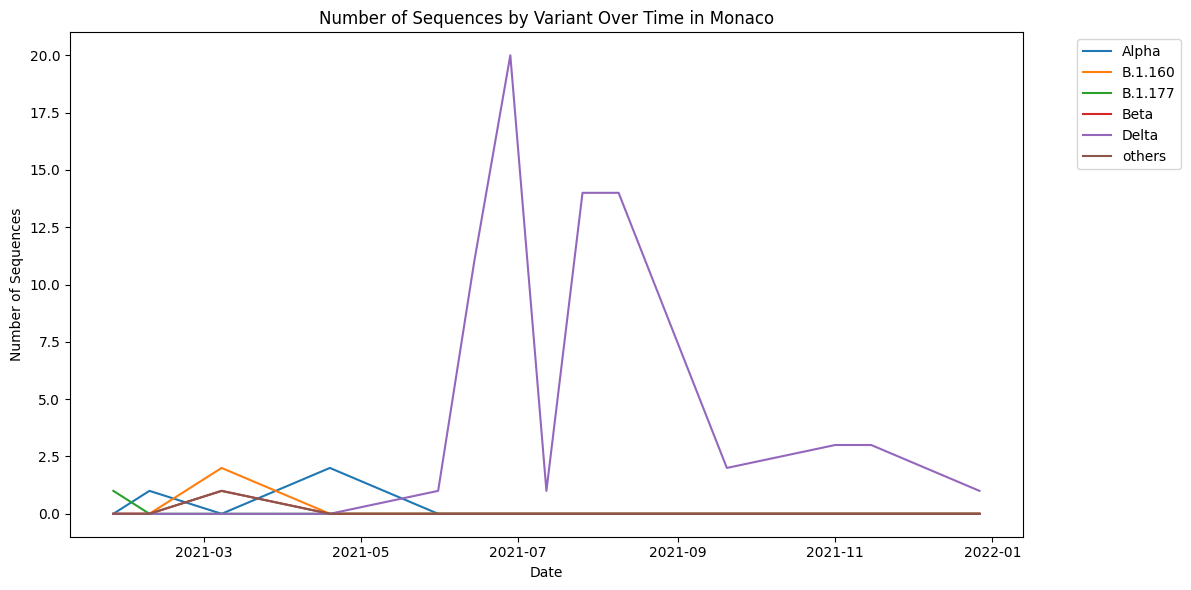

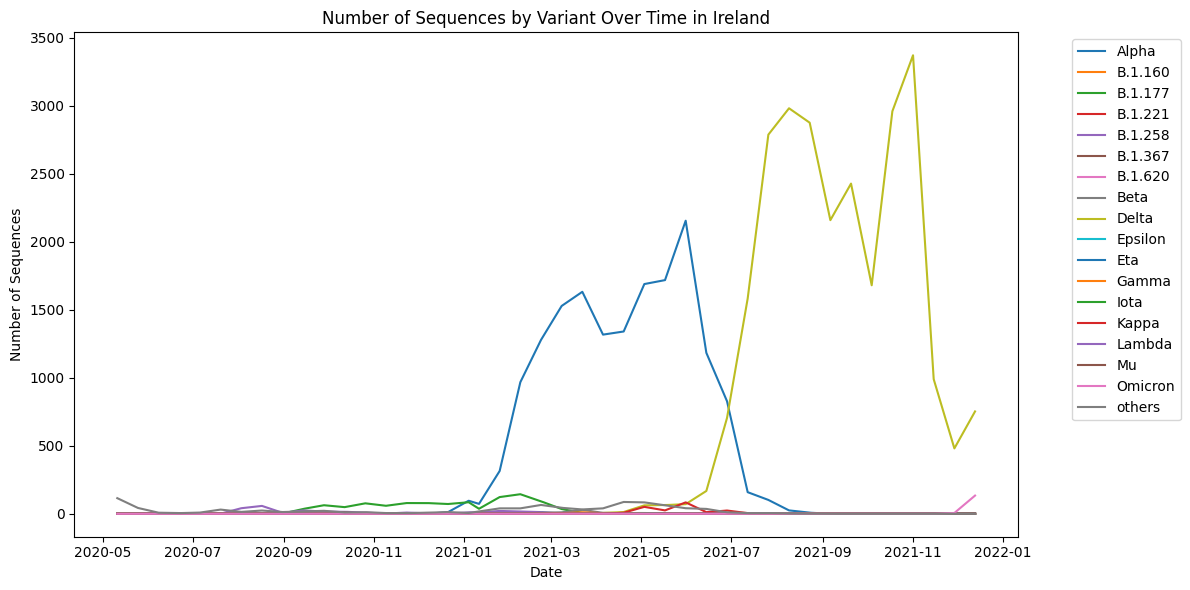

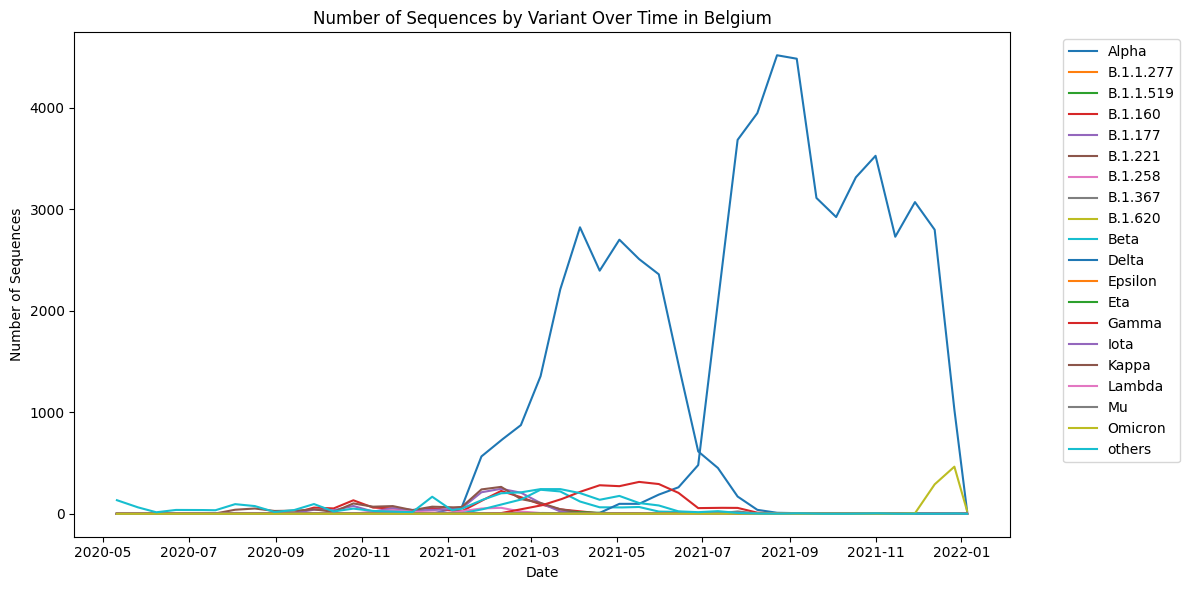

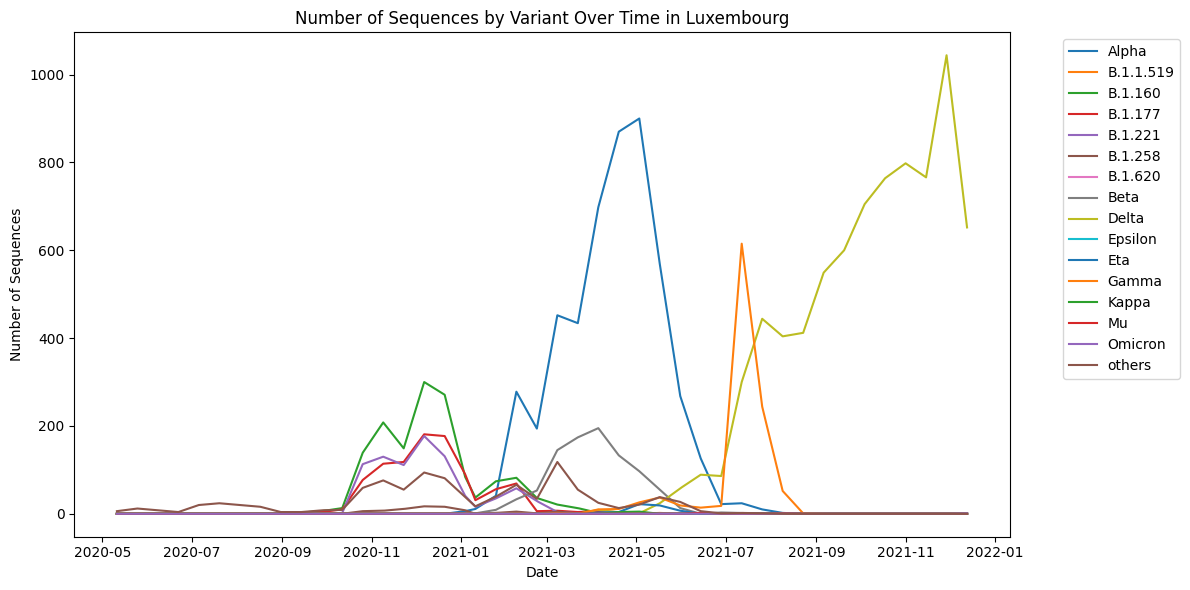

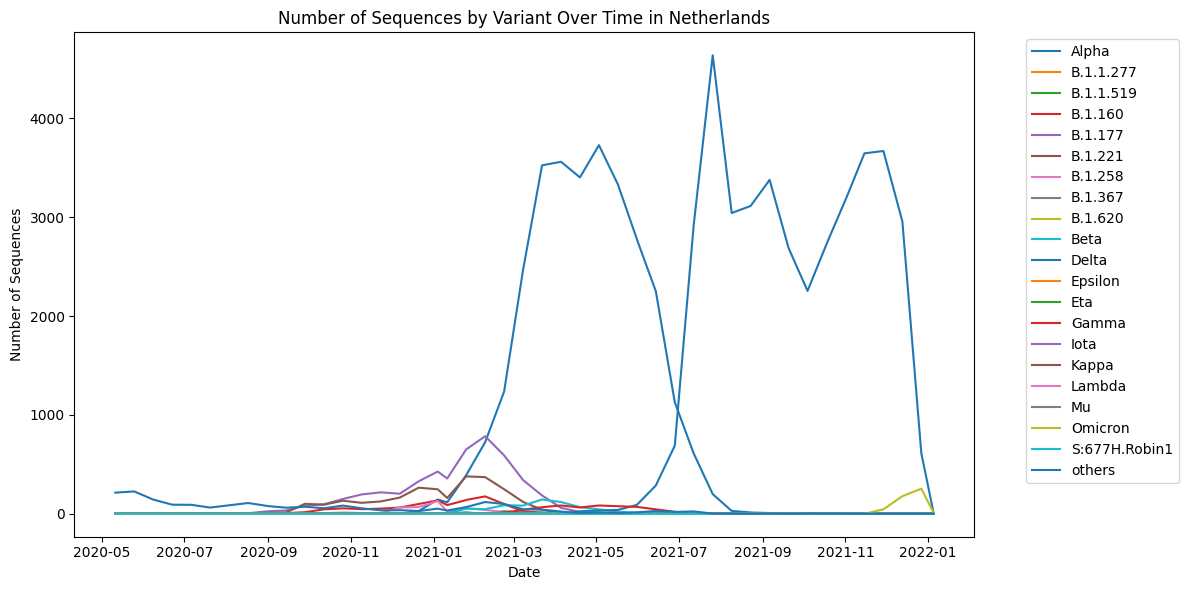

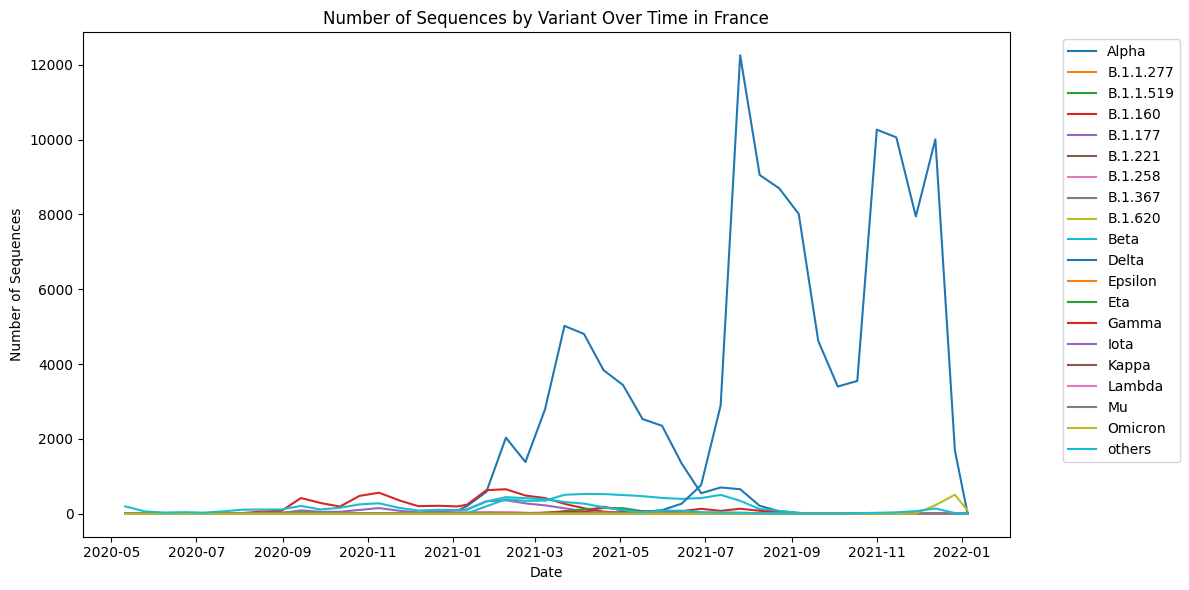

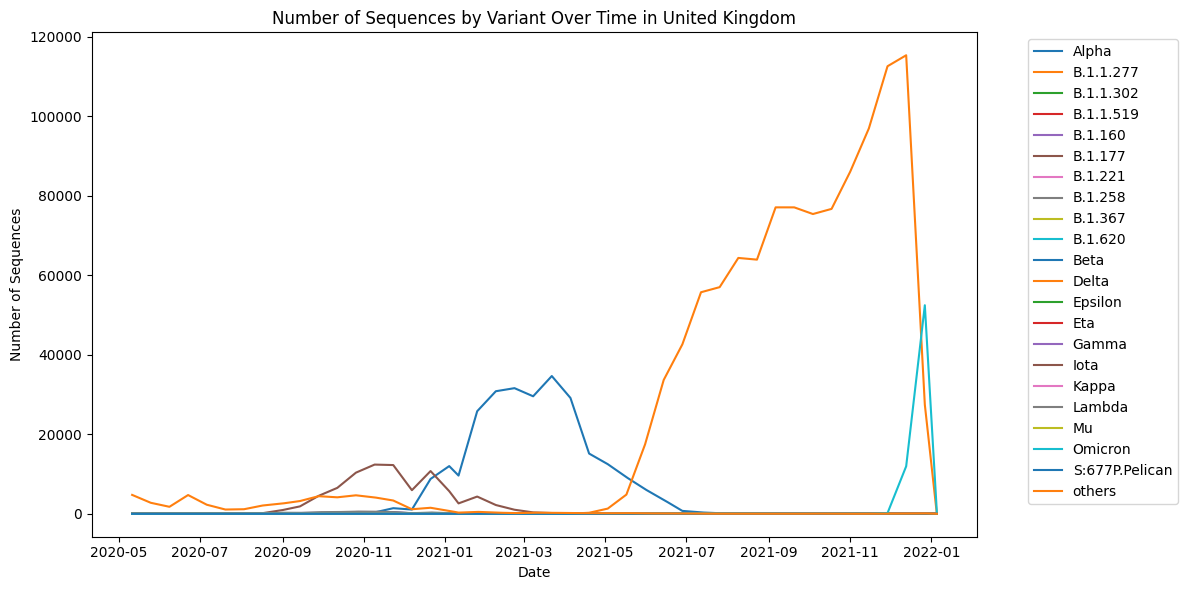

In [2]:
import matplotlib.pyplot as plt

countries = dataloader.western_europe_countries
df_plot = covid19_variants_found[covid19_variants_found['country'].isin(countries)]

for country in countries:
    plt.figure(figsize=(12, 6))
    country_data = df_plot[df_plot['country'] == country]
    for variant in country_data['variant'].unique(): #emitting the non_who variant
        if variant == 'non_who':
            continue
        variant_data = country_data[country_data['variant'] == variant]
        if variant_data['number_of_sequences'].sum() == 0: #leaving out the variant that have total value of 0 for easier plotting
            continue
        plt.plot(variant_data['date'], variant_data['number_of_sequences'], label=variant)
    plt.title(f'Number of Sequences by Variant Over Time in {country}')
    plt.xlabel('Date')
    plt.ylabel('Number of Sequences')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

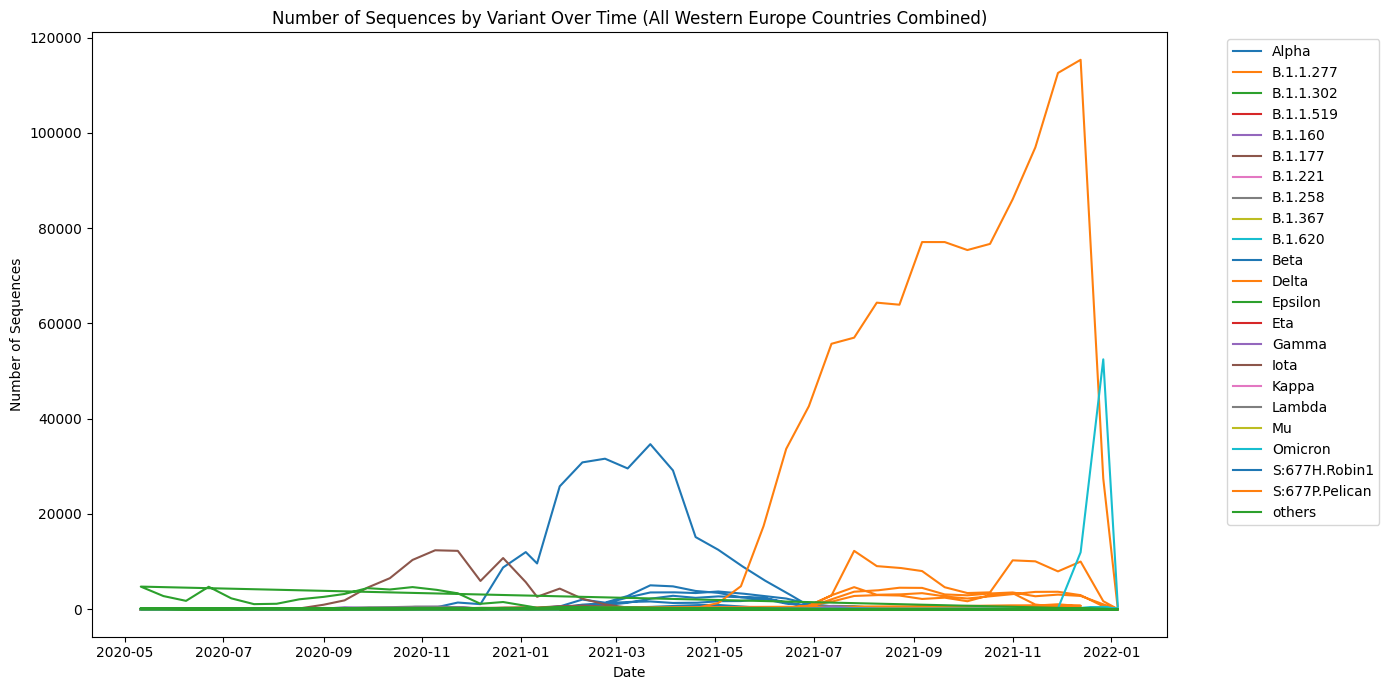

In [3]:
plt.figure(figsize=(14, 7))
for variant in df_plot['variant'].unique():
    if variant == 'non_who':
        continue
    variant_data = df_plot[df_plot['variant'] == variant]
    if variant_data['number_of_sequences'].sum() == 0:
        continue
    plt.plot(variant_data['date'], variant_data['number_of_sequences'], label=variant)
plt.title('Number of Sequences by Variant Over Time (All Western Europe Countries Combined)')
plt.xlabel('Date')
plt.ylabel('Number of Sequences')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The highest contributing country for each of these variants

In [4]:
variant_contributions = (
    df_plot[df_plot['variant'] != 'non_who']
    .groupby(['variant', 'country'])['number_of_sequences']
    .sum()
    .reset_index()
)

# Find the country with the max contribution for each variant
idx = variant_contributions.groupby('variant')['number_of_sequences'].idxmax()
top_countries = variant_contributions.loc[idx].set_index('variant')

# Calculate total sequences per variant
total_sequences_per_variant = (
    df_plot[df_plot['variant'] != 'non_who']
    .groupby('variant')['number_of_sequences']
    .sum()
)

# Add contribution percentage
top_countries['contribution_pct'] = (
    top_countries['number_of_sequences'] / total_sequences_per_variant[top_countries.index] * 100
)

# Display result
top_countries[['country', 'number_of_sequences', 'contribution_pct']]

,country,number_of_sequences,contribution_pct
variant,,,
Alpha,United Kingdom,3603306.0,71.054608
B.1.1.277,United Kingdom,2562.0,94.818653
B.1.1.302,United Kingdom,294.0,100.000000
B.1.1.519,France,612.5,40.415704
B.1.160,France,83226.5,47.858139
B.1.177,United Kingdom,1121001.0,88.875332
B.1.221,Netherlands,34986.0,42.496386
B.1.258,United Kingdom,52157.0,74.047205
B.1.367,United Kingdom,3972.5,50.692273


Now we look specifically at each country for the most spreaded variant

In [5]:
# For each country, find the variant with the highest total number of sequences (excluding 'non_who')
country_variant_totals = (
    df_plot[df_plot['variant'] != 'non_who']
    .groupby(['country', 'variant'])['number_of_sequences']
    .sum()
    .reset_index()
)

idx = country_variant_totals.groupby('country')['number_of_sequences'].idxmax()
top_variant_per_country = country_variant_totals.loc[idx].set_index('country')

top_variant_per_country[['variant', 'number_of_sequences']]

,variant,number_of_sequences
country,,
Belgium,Delta,590328.5
France,Delta,1307519.5
Ireland,Delta,361205.5
Luxembourg,Delta,103674.0
Monaco,Delta,1337.5
Netherlands,Delta,559013.0
United Kingdom,Delta,15131186.0


Looking at top 2 instead of only the most spreaded variant

In [6]:
top2_variants_per_country = (
    country_variant_totals[country_variant_totals['variant'] != 'non_who']
    .sort_values(['country', 'number_of_sequences'], ascending=[True, False])
    .groupby('country')
    .head(2)
    .set_index('country')
)

top2_variants_per_country[['variant', 'number_of_sequences']]

,variant,number_of_sequences
country,,
Belgium,Delta,590328.5
Belgium,Alpha,299019.0
France,Delta,1307519.5
France,Alpha,456120.0
Ireland,Delta,361205.5
Ireland,Alpha,229548.0
Luxembourg,Delta,103674.0
Luxembourg,Alpha,68610.5
Monaco,Delta,1337.5


---For report ???---
    Comparing to the file testing record, the sample size of sequence processed in each date is correlated to the number of patient. So we can use this number of sequence to represent number of patient in each country. We can see that there are some differents in variant spread for each country. However, for some variants, the spread is all around the region. For example, you can see that around May 2021, Delta started to spread in most country in western europe. Looking at the combined graph and the contribution of each country, it is hard to determined variants spread of each country because United Kingdom has the significantly larger sample size comparing to other country. So we look at the total sequences processed for each country. Now we can obviously see that Delta is the most widely spread variants among Western Europe. Looking at top 2, we can also see that in many countries, before Delta actually started spreading, Alpha is the most spreaded variants.